In [2]:
import pandas as pd
from textblob import TextBlob
import csv
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import os
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [40]:
n = 11
t = 'alice'
s = 1

In [41]:
novel = strip_headers(load_etext(n))
novel = novel.replace('\n', ' ')
novel= TextBlob(novel)
novel_sentences = novel.sentences
novel_title = t

In [33]:
for l in range(2):
    novelWriter = csv.writer(open('novel_'+novel_title+'3.csv', 'w'), delimiter=',')
    for sentence in novel_sentences:
        novelWriter.writerow([sentence])

In [42]:
df_novel = pd.read_csv('novel_'+novel_title+'3.csv', skiprows = s, header=None)

In [43]:
df_novel.head()

,0
0,Down the Rabbit-Hole Alice was beginning to g...
1,So she was considering in her own mind (as wel...
2,There was nothing so VERY remarkable in that; ...
3,Oh dear!
4,I shall be late!'


In [44]:
wrd_length = []
total_char = []
def wrd_char_counts(sentence):
    total_chars = 0
    wrd_counts = []
    for word in sentence:
        char_count = len(word)
        wrd_counts.append(char_count)
        total_chars += char_count
    total_char.append(total_chars)
    wrd_length.append(wrd_counts)

In [45]:
for l in df_novel[0]:
    sent = TextBlob(l)
    wrd_char_counts(sent.words)

In [46]:
df_novel['wrd_length'] = wrd_length
df_novel['total_char'] = total_char

In [47]:
df_novel.head()

,0,wrd_length,total_char
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109
3,Oh dear!,"[2, 4]",6
4,I shall be late!',"[1, 5, 2, 4]",12


In [48]:
def CountSyllables(word, isName=True):
    vowels = "aeiouy"
    #single syllables in words like bread and lead, but split in names like Breanne and Adreann
    specials = ["ia","ea"] if isName else ["ia"]
    specials_except_end = ["ie","ya","es","ed"]  #seperate syllables unless ending the word
    currentWord = word.lower()
    numVowels = 0
    lastWasVowel = False
    last_letter = ""

    for letter in currentWord:
        if letter in vowels:
            #don't count diphthongs unless special cases
            combo = last_letter+letter
            if lastWasVowel and combo not in specials and combo not in specials_except_end:
                lastWasVowel = True
            else:
                numVowels += 1
                lastWasVowel = True
        else:
            lastWasVowel = False

        last_letter = letter

    #remove es & ed which are usually silent
    if len(currentWord) > 2 and currentWord[-2:] in specials_except_end:
        numVowels -= 1

    #remove silent single e, but not ee since it counted it before and we should be correct
    elif len(currentWord) > 2 and currentWord[-1:] == "e" and currentWord[-2:] != "ee" and currentWord != 'the':
        numVowels -= 1

    return numVowels

In [49]:
syl = []
for l in df_novel[0]:
    sent = TextBlob(l)
    syl_single = []
    for x in sent.words:
        m = CountSyllables(x)
        syl_single.append(m)
    syl.append(syl_single)    

In [50]:
syl_count_arr = []
for n in syl:
    n = np.array(n)
    syl_count_arr.append(n)

In [51]:
df_novel['syl_count'] = syl_count_arr

In [52]:
df_novel.head()

,0,wrd_length,total_char,syl_count
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ..."
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ..."
3,Oh dear!,"[2, 4]",6,"[1, 2]"
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]"


In [53]:
#this doesn't work on this novel 
#d = df_novel[df_novel['total_char']<=2]


In [53]:
syl_sum = []
for l in range(0,len(df_novel)):
    syl_sum.append(df_novel['syl_count'][l].sum())

In [54]:
df_novel['syl_sum'] = syl_sum

In [55]:
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [56]:
df_novel['sentiment'] = df_novel[0].apply(detect_sentiment)

In [59]:
df_novel.to_csv('novel_'+novel_title+'3_2.csv', index=False)

In [60]:
#test
df_test = pd.read_csv('novel_'+novel_title+'3_2.csv')

In [61]:
df_test.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,[1 1 3 2 1 3 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 2 1...,83,-0.337778
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,[1 0 1 4 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 1...,70,0.031250
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,[1 1 2 1 2 3 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1...,39,0.650000
3,Oh dear!,"[2, 4]",6,[1 2],3,0.000000
4,I shall be late!',"[1, 5, 2, 4]",12,[1 1 1 1],4,-0.375000


In [57]:
df_cluster = df_novel.drop('wrd_length', 1)

In [58]:
df_cluster = df_cluster.drop('syl_count', 1)

In [62]:
df_cluster.head()

,0,total_char,syl_sum,sentiment
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778
1,So she was considering in her own mind (as wel...,229,70,0.031250
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000
3,Oh dear!,6,3,0.000000
4,I shall be late!',12,4,-0.375000


In [63]:
X = df_cluster.drop(0, axis=1)

In [64]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [65]:
km.labels_

array([ 4, 18, 13, ..., 15,  2, 14], dtype=int32)

In [66]:
df_cluster['cluster'] = km.labels_

In [67]:
km.cluster_centers_

array([[  4.18830409e+01,   1.30467836e+01,   6.22316471e-02],
       [  1.67387097e+02,   5.15806452e+01,   2.44179627e-02],
       [  4.40750000e+02,   1.36000000e+02,   5.46430517e-02],
       [  9.72947368e+01,   2.98736842e+01,   3.16311960e-02],
       [  2.65187500e+02,   8.21250000e+01,   1.50235615e-02],
       [  2.99843750e+01,   9.29296875e+00,   3.46688178e-02],
       [  7.17000000e+02,   2.27000000e+02,  -1.23884490e-02],
       [  6.88796296e+01,   2.13981481e+01,   5.44978821e-02],
       [  2.08761905e+02,   6.33809524e+01,   5.03011402e-02],
       [  1.35916667e+02,   4.18666667e+01,   3.13398430e-02],
       [  5.49931034e+01,   1.66965517e+01,   5.01170780e-03],
       [  8.26272727e+01,   2.55363636e+01,   2.08086691e-02],
       [  1.87419355e+01,   5.73387097e+00,   4.29044459e-03],
       [  1.16903226e+02,   3.57096774e+01,   7.75887359e-02],
       [  8.87700535e+00,   2.60962567e+00,  -2.10359902e-02],
       [  5.23000000e+02,   1.52333333e+02,  -3.5158730

In [68]:
df_cluster.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,41.883041,13.046784,0.062232
1,167.387097,51.580645,0.024418
2,440.750000,136.000000,0.054643
3,97.144330,29.835052,0.029713
4,265.187500,82.125000,0.015024
5,29.984375,9.292969,0.034669
6,717.000000,227.000000,-0.012388
7,68.198198,21.162162,0.047895
8,208.761905,63.380952,0.050301


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
km = KMeans(n_clusters=20, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [71]:
df_cluster['cluster'] = km.labels_

In [72]:
df_cluster.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,45.286792,13.871698,0.000471
1,221.269231,68.461538,-0.162601
2,138.440000,42.720000,0.285162
3,476.000000,143.000000,0.016157
4,36.765957,11.234043,0.514696
5,53.466667,16.733333,-0.863611
6,134.804598,41.149425,-0.056712
7,36.655556,11.188889,-0.248228
8,223.033333,67.200000,0.158646


In [73]:
centers = df_cluster.groupby('cluster').mean()

In [74]:
colors = np.array(['#999999', '#0000ff', '#4d4d4d', '#0000b2', '#8833ff', '#333333', '#4412b2', '#808080', '#33a3ff', '#124cb2', '#666666', '#39b54a','#21682b', '#64c1b5', '#2b6855', '#91c164', '#40682b', '#3fa9f5', '#7cc3f5','#badcf5'])

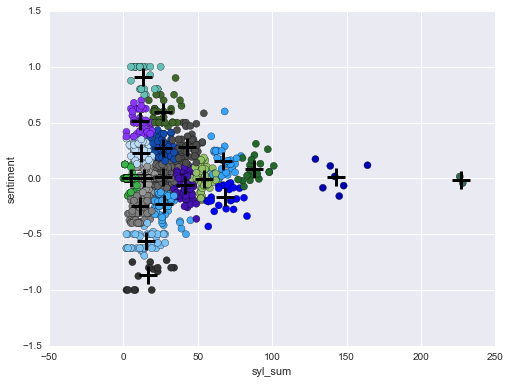

In [75]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df_cluster.syl_sum, df_cluster.sentiment, c=colors[df_cluster.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.syl_sum, centers.sentiment, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('syl_sum')
plt.ylabel('sentiment')

In [96]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.54134986452091804

In [97]:
k_range = range(2,150)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

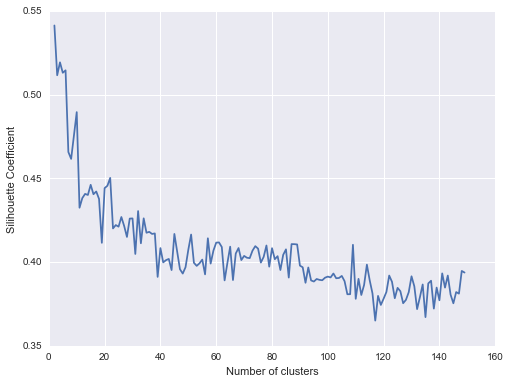

In [98]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silihouette Coefficient')
plt.grid(True)

In [100]:
c_14 = df_cluster[df_cluster['cluster']==14]

In [101]:
for x in c_14[0]:
    print x
    print '***'

Hardly knowing what she did, she picked up a little bit of stick, and held it out to the puppy; whereupon the puppy jumped into the air off all its feet at once, with a yelp of delight, and rushed at the stick, and made believe to worry it; then Alice dodged behind a great thistle, to keep herself from being run over; and the moment she appeared on the other side, the puppy made another rush at the stick, and tumbled head over heels in its hurry to get hold of it; then Alice, thinking it was very like having a game of play with a cart-horse, and expecting every moment to be trampled under its feet, ran round the thistle again; then the puppy began a series of short charges at the stick, running a very little way forwards each time and a long way back, and barking hoarsely all the while, till at last it sat down a good way off, panting, with its tongue hanging out of its mouth, and its great eyes half shut.
***
The chief difficulty Alice found at first was in managing her flamingo: she 

In [103]:
c_11 = df_cluster[df_cluster['cluster'] ==11]


In [105]:
for x in c_11[0]:
    print x
    print '****'

Oh dear!
****
'Well!'
****
Down, down, down.
****
Would the fall NEVER come to an end!
****
she said aloud.
****
Presently she began again.
****
Do you think you could manage it?)
****
Down, down, down.
****
(Dinah was the cat.)
****
Dinah my dear!
****
But do cats eat bats, I wonder?'
****
Do cats eat bats?'
****
and sometimes, 'Do bats eat cats?'
****
when suddenly, thump!
****
thump!
****
*    *    *    *    *    *    *      *    *    *    *    *    *    *    *    *    *    *    *    *  'What a curious feeling!'
****
I wonder what I should be like then?'
****
Which way?
****
*    *    *    *    *    *    *      *    *    *    *    *    *    *    *    *    *    *    *    *     CHAPTER II.
****
Good-bye, feet!'
****
Oh dear, what nonsense I'm talking!'
****
Stop this moment, I tell you!'
****
the Duchess, the Duchess!
****
Oh!
****
How queer everything is to-day!
****
I must have been changed for Mabel!
****
'How CAN I have done that?'
****
she thought.
****
she was up to her chin in 

In [106]:
colors = np.array(['#999999', '#0000ff', '#4d4d4d', '#0000b2', '#8833ff', '#333333', '#4412b2', '#808080', '#33a3ff', '#124cb2', '#666666', '#39b54a','#21682b', '#64c1b5', '#2b6855', '#91c164', '#40682b', '#3fa9f5', '#7cc3f5','#badcf5'])

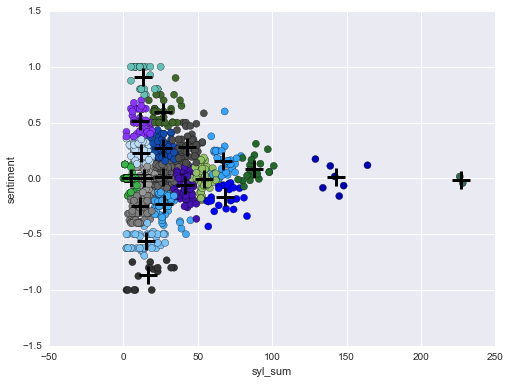

In [107]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df_cluster.syl_sum, df_cluster.sentiment, c=colors[df_cluster.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.syl_sum, centers.sentiment, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('syl_sum')
plt.ylabel('sentiment')

In [108]:
for x in range(0,20):
    print len(df_cluster[df_cluster['cluster'] == x])

265
26
50
7
47
15
87
90
30
56
154
485
19
24
2
59
32
60
37
81


In [110]:
w = df_cluster.groupby('cluster').mean()

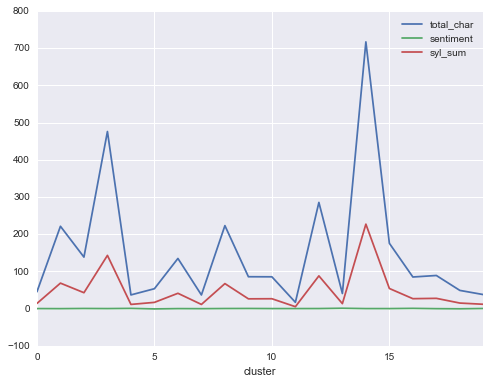

In [111]:
w.plot()

In [112]:
df_cluster2 = df_cluster.groupby('cluster').mean()

In [113]:
df_cluster2

,total_char,sentiment,syl_sum
cluster,,,
0,45.286792,0.000471,13.871698
1,221.269231,-0.162601,68.461538
2,138.440000,0.285162,42.720000
3,476.000000,0.016157,143.000000
4,36.765957,0.514696,11.234043
5,53.466667,-0.863611,16.733333
6,134.804598,-0.056712,41.149425
7,36.655556,-0.248228,11.188889
8,223.033333,0.158646,67.200000


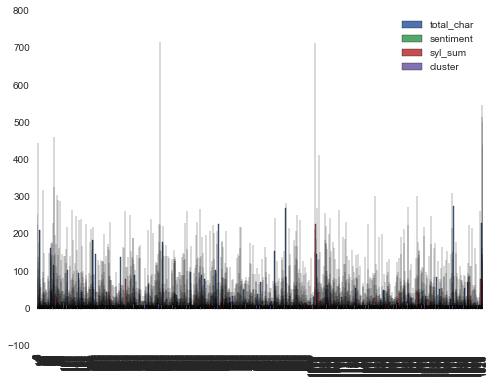

In [114]:
df_cluster.plot(kind='bar')

In [117]:
df_novel['total_char'].sum()

109528

In [130]:
ratio = (df_novel['total_char'].sum()/20) - 50

In [119]:
ratio

5476

In [148]:
t = 0
x = 0
ratio = (df_novel['total_char'].sum()/20) - 100
def find_this(t, x):
    w = 0    
    sent_stop = []
    while w <= ratio:
        w = df_novel['total_char'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop)     

In [149]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(1, 21):
    s = find_this(t, x)
    print "df_novel['total_char'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1      

df_novel['total_char'][0:60]
df_novel['total_char'][60:115]
df_novel['total_char'][115:192]
df_novel['total_char'][192:264]
df_novel['total_char'][264:352]
df_novel['total_char'][352:443]
df_novel['total_char'][443:505]
df_novel['total_char'][505:586]
df_novel['total_char'][586:655]
df_novel['total_char'][655:741]
df_novel['total_char'][741:843]
df_novel['total_char'][843:938]
df_novel['total_char'][938:1019]
df_novel['total_char'][1019:1078]
df_novel['total_char'][1078:1164]
df_novel['total_char'][1164:1272]
df_novel['total_char'][1272:1363]
df_novel['total_char'][1363:1446]
df_novel['total_char'][1446:1532]
df_novel['total_char'][1532:1623]


In [150]:
twenty_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_novel['sentiment'][strt:stp].mean()
    twenty_piece_char.append(mn)
    print mn
    st +=1   

0
60
0.0471425918603
60
115
0.0291150727417
115
192
-0.00841434619931
192
264
0.0203819494549
264
352
0.0321346463143
352
443
0.0297514928473
443
505
0.0152957648113
505
586
0.00289304584631
586
655
0.0117530836811
655
741
-0.0366886297918
741
843
0.0155608319717
843
938
0.0100220247589
938
1019
-0.0142449794147
1019
1078
0.0350751126508
1078
1164
0.0387175464501
1164
1272
0.0322697970111
1272
1363
0.0647142857143
1363
1446
0.0876633199465
1446
1532
0.0219613652793
1532
1623
0.0693888452817


In [126]:
df_novel.tail()

,0,wrd_length,total_char,syl_count,sentiment,syl_sum
1621,"But her sister sat still just as she left her,...","[3, 3, 6, 3, 5, 4, 2, 3, 4, 3, 7, 3, 4, 2, 3, ...",549,"[1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 1, ...",0.117857,164
1622,The long grass rustled at her feet as the Whit...,"[3, 4, 5, 7, 2, 3, 4, 2, 3, 5, 6, 7, 2, 3, 10,...",516,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, ...",-0.065000,148
1623,"So she sat on, with closed eyes, and half beli...","[2, 3, 3, 2, 4, 6, 4, 3, 4, 8, 7, 2, 10, 6, 3,...",504,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 3, 1, 0, ...",-0.158333,145
1624,"Lastly, she pictured to herself how this same ...","[6, 3, 8, 2, 7, 3, 4, 4, 6, 6, 2, 4, 5, 2, 3, ...",441,"[2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",0.173333,129
1625,THE END,"[3, 3]",6,"[1, 1]",0.000000,2


In [151]:
n = np.array(n)
twenty_piece_char = np.array(twenty_piece_char)
print twenty_piece_char

[ 0.04714259  0.02911507 -0.00841435  0.02038195  0.03213465  0.02975149
  0.01529576  0.00289305  0.01175308 -0.03668863  0.01556083  0.01002202
 -0.01424498  0.03507511  0.03871755  0.0322698   0.06471429  0.08766332
  0.02196137  0.06938885]


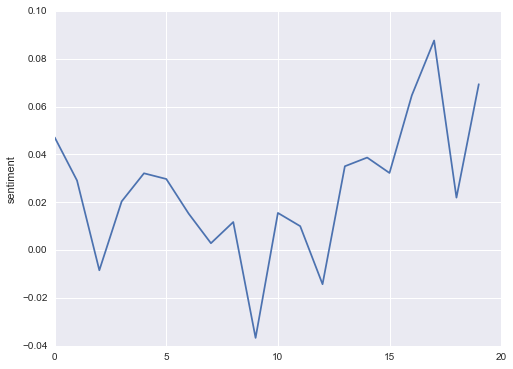

In [157]:
plt.plot(twenty_piece_char)
plt.ylabel('sentiment')
plt.show()

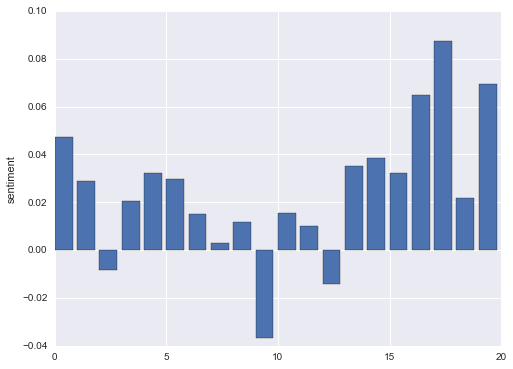

In [161]:
plt.bar(range(20), twenty_piece_char)
plt.ylabel('sentiment')
plt.show()

In [162]:
for x in df_novel[0][938:1019]:
    print x
    print '****'

Five and Seven said nothing, but looked at Two.
****
Two began in a low voice, 'Why the fact is, you see, Miss, this here ought to have been a RED rose-tree, and we put a white one in by mistake; and if the Queen was to find it out, we should all have our heads cut off, you know.
****
So you see, Miss, we're doing our best, afore she comes, to--' At this moment Five, who had been anxiously looking across the garden, called out 'The Queen!
****
The Queen!'
****
and the three gardeners instantly threw themselves flat upon their faces.
****
There was a sound of many footsteps, and Alice looked round, eager to see the Queen.
****
First came ten soldiers carrying clubs; these were all shaped like the three gardeners, oblong and flat, with their hands and feet at the corners: next the ten courtiers; these were ornamented all over with diamonds, and walked two and two, as the soldiers did.
****
After these came the royal children; there were ten of them, and the little dears came jumping merr

In [38]:
df_cluster3 = df_cluster

In [39]:
df_cluster3.head()

,0,total_char,sentiment,syl_sum,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,-0.337778,83,1
1,So she was considering in her own mind (as wel...,229,0.031250,70,8
2,There was nothing so VERY remarkable in that; ...,109,0.650000,39,16
3,Oh dear!,6,0.000000,3,11
4,I shall be late!',12,-0.375000,4,7


In [76]:
X = df_cluster3.drop(0, axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [78]:
km.labels_

array([2, 2, 0, ..., 2, 2, 0], dtype=int32)

In [81]:
df_cluster3['cluster'] = km.labels_

In [82]:
df_cluster3.head()

,0,total_char,sentiment,syl_sum,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,-0.337778,83,2
1,So she was considering in her own mind (as wel...,229,0.031250,70,2
2,There was nothing so VERY remarkable in that; ...,109,0.650000,39,0
3,Oh dear!,6,0.000000,3,0
4,I shall be late!',12,-0.375000,4,0


In [83]:
df_cluster3.groupby('cluster').mean()

,total_char,sentiment,syl_sum
cluster,,,
0,42.400971,0.007878,13.063107
1,49.281437,0.091732,15.089820
2,188.530534,0.009628,57.809160


In [93]:
df_cluster4 = df_cluster3
df_cluster4.head()

,0,total_char,sentiment,syl_sum,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,-0.337778,83,1
1,So she was considering in her own mind (as wel...,229,0.031250,70,1
2,There was nothing so VERY remarkable in that; ...,109,0.650000,39,2
3,Oh dear!,6,0.000000,3,0
4,I shall be late!',12,-0.375000,4,0


In [94]:
df_cluster4 = df_cluster4.drop('syl_sum', 1)

In [96]:
X = df_cluster4.drop(0, axis=1)

In [95]:
df_cluster4.head()

,0,total_char,sentiment,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,-0.337778,1
1,So she was considering in her own mind (as wel...,229,0.031250,1
2,There was nothing so VERY remarkable in that; ...,109,0.650000,2
3,Oh dear!,6,0.000000,0
4,I shall be late!',12,-0.375000,0


In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [99]:
km.labels_

array([2, 2, 1, ..., 2, 2, 0], dtype=int32)

In [100]:
df_cluster4['cluster'] = km.labels_

In [101]:
df_cluster4.groupby('cluster').mean()

,total_char,sentiment
cluster,,
0,40.223284,-0.051089
1,66.083333,0.454515
2,189.023166,0.007352


In [111]:
df_novel.tail()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
1621,"But her sister sat still just as she left her,...","[3, 3, 6, 3, 5, 4, 2, 3, 4, 3, 7, 3, 4, 2, 3, ...",549,"[1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 1, ...",164,0.117857
1622,The long grass rustled at her feet as the Whit...,"[3, 4, 5, 7, 2, 3, 4, 2, 3, 5, 6, 7, 2, 3, 10,...",516,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, ...",148,-0.065000
1623,"So she sat on, with closed eyes, and half beli...","[2, 3, 3, 2, 4, 6, 4, 3, 4, 8, 7, 2, 10, 6, 3,...",504,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 3, 1, 0, ...",145,-0.158333
1624,"Lastly, she pictured to herself how this same ...","[6, 3, 8, 2, 7, 3, 4, 4, 6, 6, 2, 4, 5, 2, 3, ...",441,"[2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",129,0.173333
1625,THE END,"[3, 3]",6,"[1, 1]",2,0.000000


In [103]:
df_novel_senti = df_novel

In [104]:
df_novel_senti['total_char'].sum()

109528

In [105]:
ratio = (df_novel['total_char'].sum()/3)

In [106]:
ratio

36509

In [116]:
t = 0
x = 0
ratio = (df_novel['total_char'].sum()/3) -00
def find_this(t, x):
    w = 0    
    sent_stop = []
    while w < ratio:
        w = df_novel['total_char'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop)  

SyntaxError: 'break' outside loop (<ipython-input-116-ada6891d6985>, line 12)

In [115]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(1, 21):
    s = find_this(t, x)
    print "df_novel['total_char'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1  

df_novel['total_char'][0:482]
df_novel['total_char'][482:1042]
df_novel['total_char'][1042:1623]


KeyboardInterrupt: 

In [117]:
start_point

[0, 482, 1042]

In [121]:
three_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_novel['sentiment'][strt:stp].mean()
    three_piece_char.append(mn)
    print mn
    st +=1

0
482
0.0209354557271
482
1042
0.00324546861249
1042
1623
0.0505208745095


In [125]:
n = np.array(n)
three_piece_char = np.array(three_piece_char)
print three_piece_char

[ 0.02093546  0.00324547  0.05052087]


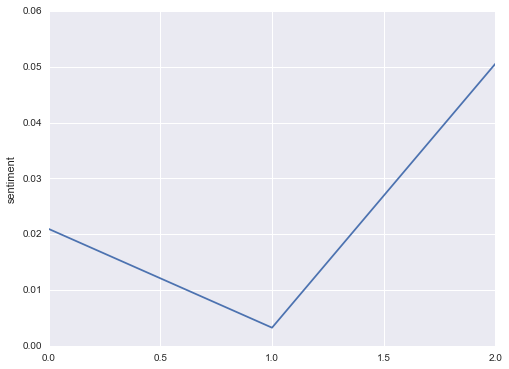

In [126]:
plt.plot(three_piece_char)
plt.ylabel('sentiment')
plt.show()

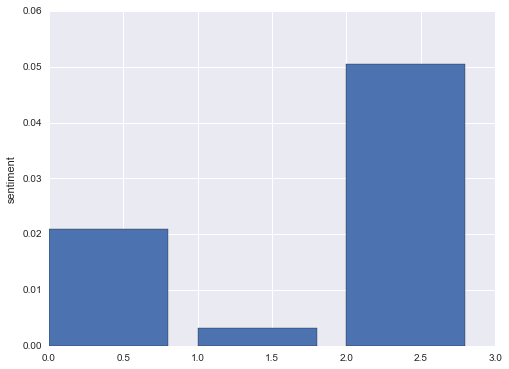

In [124]:
plt.bar(range(3), three_piece_char)
plt.ylabel('sentiment')
plt.show()

In [128]:
df_cluster.head()

,0,total_char,syl_sum,sentiment,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778,1
1,So she was considering in her own mind (as wel...,229,70,0.031250,8
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000,16
3,Oh dear!,6,3,0.000000,11
4,I shall be late!',12,4,-0.375000,7


In [129]:
df_cluster5 = df_cluster

In [130]:
df_cluster.head()

,0,total_char,syl_sum,sentiment,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778,1
1,So she was considering in her own mind (as wel...,229,70,0.031250,8
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000,16
3,Oh dear!,6,3,0.000000,11
4,I shall be late!',12,4,-0.375000,7


In [131]:
X = df_cluster5.drop(0, axis=1)

In [132]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [133]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [134]:
df_cluster5['cluster'] = km.labels_

In [135]:
df_cluster5.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,37.585311,11.528814,-0.065021
1,60.933333,18.894444,0.492801
2,529.555556,161.666667,0.009813
3,169.704225,52.105634,0.033182
4,46.026119,14.119403,0.002250


In [137]:
alice_cluster_5 = df_cluster5.groupby('cluster').mean()

In [138]:
alice_cluster_5.to_csv('alice_cluster_5.csv', index=False)